# Assignment 6L - Laplace Transform
### Yogesh Agarwala (EE19B130)

In [117]:
import numpy as np 
import scipy.signal as sp 
import pylab 

In [150]:
"""
Function to plot graphs 
"""
def display_plot(i,x,y,title,xlabel='time',ylabel='x'):
    pylab.figure(i)
    pylab.plot(x,y)
    pylab.title(title)
    pylab.xlabel(r'{}'.format(xlabel),fontsize=15)
    pylab.ylabel(r'{}'.format(ylabel),fontsize=15)
    pylab.grid()
    pylab.show()

## 1. Time Response of a Spring

In [151]:
def func_H(freq,decay):
    num = np.poly1d([1,freq])
    den = np.poly1d([1,(2*freq),((freq*freq)+(decay*decay))])
    return num, den

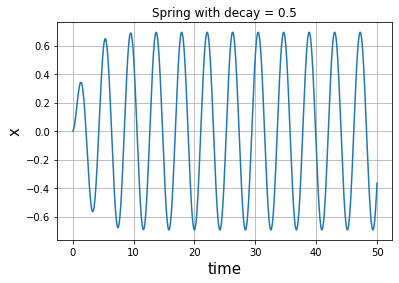

In [152]:
num,den = func_H(0.5,1.5)
den = np.polymul([1,0,2.25],den)

H1 = sp.lti(num,den)
t = np.linspace(0,50,1000)

t,x = sp.impulse(H1,T=t)
display_plot(0,t,x,"Spring with decay = 0.5", 'time','x')

## 2. Time Response of a Spring with a much smaller decay

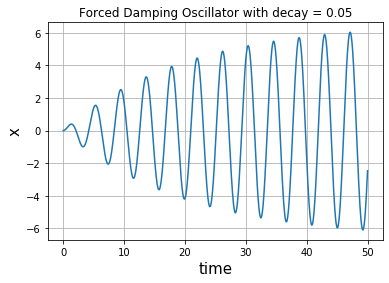

In [153]:
num,den = func_H(0.05,1.5)
den = np.polymul([1,0,2.25],den)

H2 = sp.lti(num,den)
t = np.linspace(0,50,1000)

t,x = sp.impulse(H2,T=t)
display_plot(0,t,x,"Spring with decay = 0.05", 'time','x')

## 3. LTI response over different frequencies of applied force

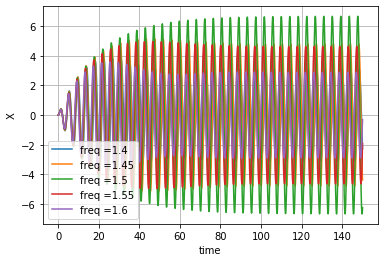

In [154]:
freqs = np.linspace(1.4,1.6,5)
leg = []
for freq in freqs:
    num = np.poly1d([1])            # Numerator of transfer function
    den = np.poly1d([1,0,2.25])     # Denominator of tranfer functioin
    H = sp.lti(num,den)             # Transfer function
    t = np.linspace(0,150,5001)  # Time range for graph
    f = np.cos(freq*t)*np.exp(-0.05*t)  # Forcing function
    
    t,y,svec=sp.lsim(H,f,t)         # Output wave found as convolution

    leg.append("freq =" + str(freq))
    pylab.xlabel('time')
    pylab.ylabel('X')
    pylab.plot(t,y)

pylab.grid()
pylab.legend(leg)
pylab.show()

## 4. Coupled Spring System

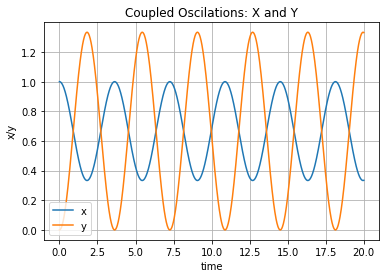

In [155]:
Hx = sp.lti(np.poly1d([1,0,2]),np.poly1d([1,0,3,0]))
t = np.linspace(0,20,1000)
t1,x = sp.impulse(Hx,T=t)

Hy = sp.lti(np.poly1d([2]),np.poly1d([1,0,3,0]))
t = np.linspace(0,20,1000)
t2,y = sp.impulse(Hy,T=t)


pylab.title("Coupled Oscilations")
pylab.plot(t1,x)
pylab.plot(t2,y)
pylab.xlabel('time')
pylab.ylabel('x/y')
pylab.legend(['x','y'])
pylab.grid()
pylab.show()

## 5. Magnitude and Phase response of Two port network

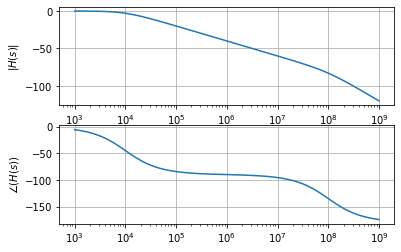

In [156]:
H = sp.lti(np.poly1d([1000000]),np.poly1d([0.000001,100,1000000]))
w,S,phi=H.bode()

"""
Magnitude response
"""
pylab.subplot(2,1,1)
pylab.semilogx(w,S)
pylab.ylabel(r'$|H(s)|$')
pylab.grid()

"""
Phase response
"""
pylab.subplot(2,1,2)
pylab.semilogx(w,phi)
pylab.ylabel(r'$\angle(H(s))$')
pylab.grid()
pylab.show()

## 6. Output Voltage

In [157]:
"""
This function returns Low pass filter response for given input and time period
"""
def RLC(t, R=100, L=1e-6, C=1e-6):
    H = sp.lti([1],[L*C,R*C,1])
    vi = np.multiply(np.cos(1000*t)-np.cos(1000000*t),np.heaviside(t,0.5))
    
    return sp.lsim(H,vi,t)

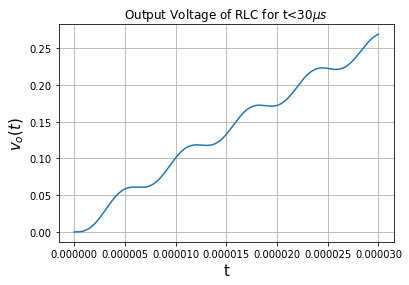

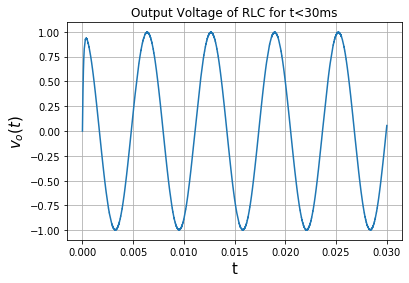

In [158]:
t = np.linspace(0,30*0.000001,10000)
_,y1,svec = RLC(t)
display_plot(5,t,y1,"Output Voltage for t<30$\mu s$", 't',r'$v_{o}(t)$')


t = np.linspace(0,30*0.001,10000)
_,y2,svec = RLC(t)
display_plot(6,t,y2,"Output Voltage for t<30ms",'t',r'$v_{o}(t)$')